In [1]:
import numpy as np
from importlib import reload
import sowfa_precursor
sowfa_precursor = reload(sowfa_precursor)
%matplotlib inline

# Creat sowfa_precursor object and enter neccisary user inputs

In [2]:
perInf_001_5 =  sowfa_precursor.Sim(
    dir='/projects/windsim/mlawson/wake_steering/stableABLRuns/infPer_0.001m_5m',
    log='log.3.ABLSolver',
    time_dir='25000',
    avg_time=29000,
    avg_width=2000,
    z_level=90.0)
perInf_001_5.input['heights'] = np.array([0,1/2,1,3/2,2,3,4,5])*perInf_001_5.input['windHeight']

Read "zCell" from:
	/projects/windsim/mlawson/wake_steering/stableABLRuns/infPer_0.001m_5m/postProcessing/averaging/25000/hLevelsCell
Read SOWFA "setUp" file:
	/projects/windsim/mlawson/wake_steering/stableABLRuns/infPer_0.001m_5m/setUp
Set uStarMean = 0.344459907501 from SOWFA ".log" file:
	/projects/windsim/mlawson/wake_steering/stableABLRuns/infPer_0.001m_5m/log.3.ABLSolver


## Make Plots

Time from  27999.785468799997 to  29999.375981800004


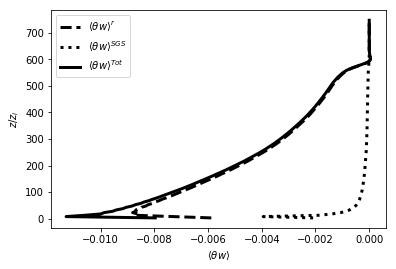

In [3]:
perInf_001_5.theta_w_avg_cell()

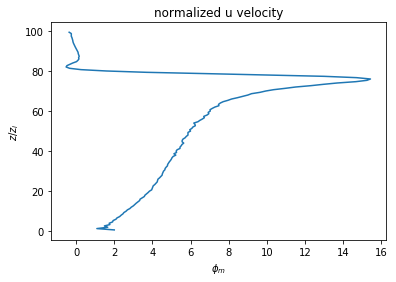

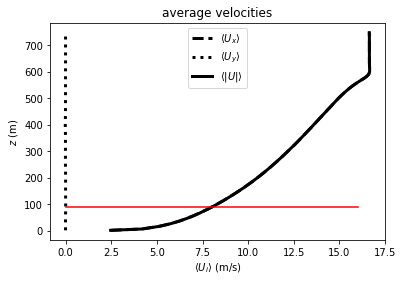

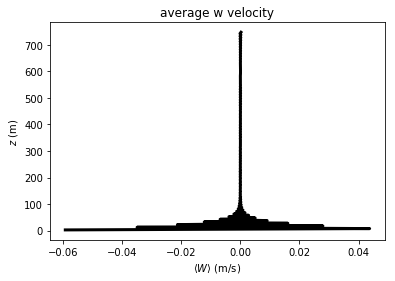

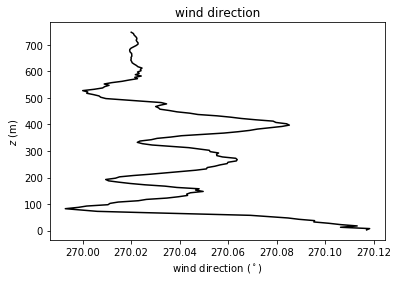

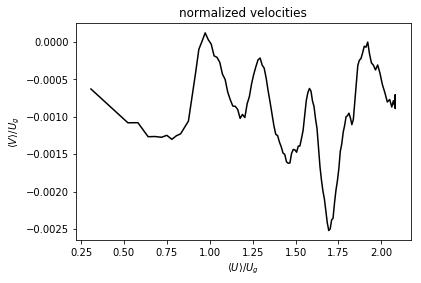

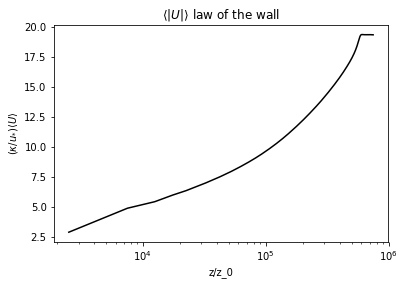

In [4]:
perInf_001_5.Umean_avg_nonnormalized()

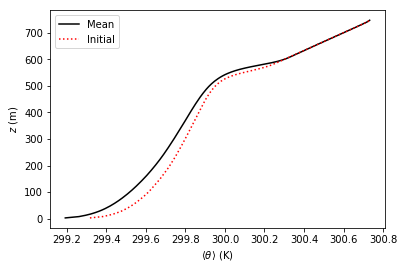

In [5]:
perInf_001_5.Tmean_avg_nonnormalized()

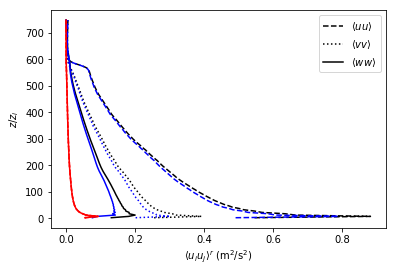

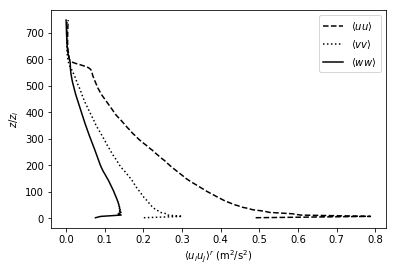

In [6]:
perInf_001_5.variances_avg_cell()